# Classification Using The Allen Cell Types Electrophysiological Data   

**Author: Zak Hussain**  
**Date: 08/08/2019**   


### Project Background:

Classification algorithms are a form of supervised learning. The main idea is train a classification model (i.e. generate a target function), that maps each instance of a feature set X to a class label y. 
    
In my CS7180 course (Special topics in AI) we discussed two types of classification models--descriptive and predictive modeling. 

* Descriptive modeling serves as an tool to distinguish between objects of different classes by describing the features that make up an instance of a class. 
    
* Predictive modeling on the otherhand uses an instance of the features as input to predict the class label. 
    
For the scope of this project, I will focus on predictive modeling for: 
* probablistic predictive classification model (i.e. Logistic Regression) 
* predictive classification model using the classification models discussed in class(e.g. KNN, Decision Tree, etc.) 

### Objective 1: Data Understanding 

In [1]:
from allensdk.core.cell_types_cache import CellTypesCache 
from allensdk.api.queries.cell_types_api import CellTypesApi
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

**Question 1:** Whats in their database? 

In [2]:
# generate a manifest file to cache cell data 
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

# get list of cell metadata 
cells = ctc.get_cells(species=[CellTypesApi.MOUSE])
print("Mus musculus: %d instances of mouse cells recorded from." % len(cells))

Mus musculus: 1920 instances of mouse cells recorded from.


In [3]:
# each cells[i] instance contains the following metadata:
print("Each cell has a set of metadata describing where the specimen came from")
cells[0]

Each cell has a set of metadata describing where the specimen came from


{'reporter_status': 'positive',
 'cell_soma_location': [8966.56330957526, 1429.52689052075, 8567.389672505],
 'species': 'Mus musculus',
 'id': 565871768,
 'name': 'Oxtr-2A-Cre;Ai14-293837.03.01.02',
 'structure_layer_name': '5',
 'structure_area_id': 385,
 'structure_area_abbrev': 'VISp',
 'transgenic_line': 'Oxtr-T2A-Cre',
 'dendrite_type': 'aspiny',
 'apical': 'NA',
 'reconstruction_type': None,
 'disease_state': '',
 'donor_id': 563340157,
 'structure_hemisphere': 'left',
 'normalized_depth': 0.582056591439023}

**Question 1b:** How do I find the Electrophysioligical features of a single cell? 

In [4]:
# Using cells[i]['id'], retrieve the ephys_data for a single cell. 
cell_one_id = cells[0]['id']
# cell_one_id = 464212183
# stores an NwbDataSet instance that has helper methods for retrieving stimulus
# and response traces. 
cell_one_ephys_data = ctc.get_ephys_data(cell_one_id)

# download the sweep metadata for a single specimen. 
cell_one_sweep_metadata = ctc.get_ephys_sweeps(cell_one_id)


print("You can access the electrophysiological sweep metada from one cell")
# each sweep has metadata, starts with test sweeps: Smoke, Bath, Cell
# attachment, and whole cell test cells[0-3], and ends with Whole cell, Pull-off,
# and Electrode Drift tests cells[-3 -> -1]
cell_one_sweep_metadata[-3]

You can access the electrophysiological sweep metada from one cell


{'bridge_balance_mohm': None,
 'id': 565873431,
 'leak_pa': None,
 'num_spikes': None,
 'peak_deflection': None,
 'post_noise_rms_mv': None,
 'post_vm_mv': None,
 'pre_noise_rms_mv': None,
 'pre_vm_mv': None,
 'slow_noise_rms_mv': None,
 'slow_vm_mv': None,
 'specimen_id': 565871768,
 'stimulus_absolute_amplitude': None,
 'stimulus_description': 'EXTPEXPEND141203[0]',
 'stimulus_duration': None,
 'stimulus_interval': None,
 'stimulus_name': 'Test',
 'stimulus_relative_amplitude': 1.0,
 'stimulus_start_time': None,
 'stimulus_units': 'Volts',
 'sweep_number': 92,
 'vm_delta_mv': None}

**Question 1c.** What does a sweep look like? 

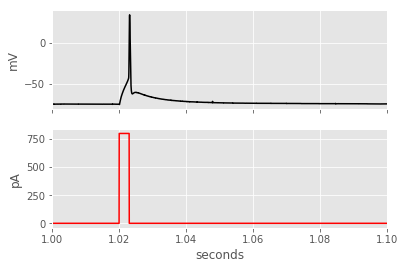

In [5]:
# single spike 
# these are the non-test sweep data
non_test_sweeps = cell_one_ephys_data.get_sweep_numbers()

# Use the nwb data set to capture the a single sweep from the cell.
cell_one_first_sweep = cell_one_ephys_data.get_sweep(20)

# grab necessary data from a single sweep for the specific cell. 
index_range = cell_one_first_sweep['index_range']
stimulus = cell_one_first_sweep['stimulus']
response = cell_one_first_sweep['response']
sampling_rate = cell_one_first_sweep['sampling_rate'] # Hz 

# set the indexing to be 0 to 101150, and shift amps to pA and volts to mV 
I = stimulus[0:index_range[1] + 1] * 1e12 # in pA
V = response[0:index_range[1] + 1] * 1e3 # in mV

# get time in seconds 
time = np.arange(0, len(V)) * (1.0 / sampling_rate) # seconds 

%matplotlib inline 

plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(time, V, color='black')
axes[0].set_ylabel("mV")
axes[1].plot(time, I, color='red') 
axes[1].set_ylabel("pA") 
axes[1].set_xlabel("seconds")
plt.xlim(1.0, 1.1)
plt.show()

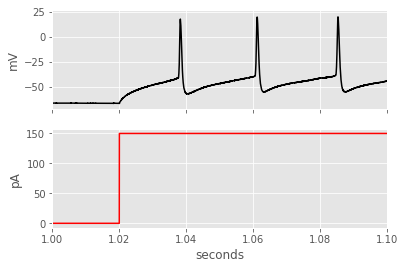

In [6]:
# spike train 
# Using cells[i]['id'], retrieve the ephys_data for a single cell. 
cell_one_id = 464212183

# stores an NwbDataSet instance that has helper methods for retrieving stimulus
# and response traces. 
cell_one_ephys_data = ctc.get_ephys_data(cell_one_id)

# download the sweep metadata for a single specimen. 
cell_one_sweep_metadata = ctc.get_ephys_sweeps(cell_one_id)
# these are the non-test sweep data
non_test_sweeps = cell_one_ephys_data.get_sweep_numbers()

# Use the nwb data set to capture the a single sweep from the cell.

cell_one_first_sweep = cell_one_ephys_data.get_sweep(32)
# grab necessary data from a single sweep for the specific cell. 
index_range = cell_one_first_sweep['index_range']
stimulus = cell_one_first_sweep['stimulus']
response = cell_one_first_sweep['response']
sampling_rate = cell_one_first_sweep['sampling_rate'] # Hz 

# set the indexing to be 0 to 101150, and shift amps to pA and volts to mV 
I = stimulus[0:index_range[1] + 1] * 1e12 # in pA
V = response[0:index_range[1] + 1] * 1e3 # in mV

# get time in seconds 
time = np.arange(0, len(V)) * (1.0 / sampling_rate) # seconds 

%matplotlib inline 

plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(time, V, color='black')
axes[0].set_ylabel("mV")
axes[1].plot(time, I, color='red') 
axes[1].set_ylabel("pA") 
axes[1].set_xlabel("seconds")
plt.xlim(1.0, 1.1)
plt.show()

**Question 1d.** What can I learn about spikes? 

In [35]:
# for the cell above, we can use the feature extractor to learn more about 
# the electrophysiological recording. 
from allensdk.ephys.ephys_extractor import EphysSweepFeatureExtractor

sweep_extractor = EphysSweepFeatureExtractor(t=time,
                                             v=V,
                                             i=I, 
                                             start=1.0, 
                                             end=1.1)

# using the sweep_extractor feature from above, we can get a feature analysis 
# of the spike. 
sweep_extractor.process_spikes()

print("I can extract features from the recording iteself!")
sweep_extractor.spikes()[0]

I can extract features from the recording iteself!


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


{'threshold_index': 207535,
 'clipped': False,
 'threshold_t': 1.0376750000000001,
 'threshold_v': -40.59375,
 'threshold_i': 150,
 'peak_index': 207647,
 'peak_t': 1.038235,
 'peak_v': 17.5,
 'peak_i': 150,
 'trough_index': 208056,
 'trough_t': 1.04028,
 'trough_v': -56.78125,
 'trough_i': 150,
 'upstroke_index': 207601,
 'upstroke': 211.2644465196511,
 'upstroke_t': 1.038005,
 'upstroke_v': -10.46875,
 'downstroke_index': 207716,
 'downstroke': -110.0037882280514,
 'downstroke_t': 1.03858,
 'downstroke_v': -7.781250476837158,
 'isi_type': 'direct',
 'fast_trough_index': 208034,
 'fast_trough_t': 1.04017,
 'fast_trough_v': -56.6875,
 'fast_trough_i': 150,
 'adp_index': nan,
 'adp_t': nan,
 'adp_v': nan,
 'adp_i': nan,
 'slow_trough_index': nan,
 'slow_trough_t': nan,
 'slow_trough_v': nan,
 'slow_trough_i': nan,
 'width': 0.0007300000000001194,
 'upstroke_downstroke_ratio': 1.9205197377537024}

In [8]:
1e3 * np.nanmean(sweep_extractor.spike_feature("width"))

0.7733333333333666

### Objective 2: Use a Linear model--Logistic Regression
**Preprocessing:**

In [9]:
# for every specimen, we also have a set of features. 
# in this case, we have both Human and Mouse cells.

# 1. store ephys features (ef_df). 
ef_df = ctc.get_ephys_features(dataframe=True)

C:\Users\shuss\AppData\Roaming\Python\Python37\site-packages\allensdk\core\cell_types_cache.py:194: UserWarning: dataframe argument is deprecated.
  warnings.warn("dataframe argument is deprecated.")


In [10]:
# step 2. generate needed columns for all 2333 cells 

# get all metadata for all cells 
cells = ctc.get_cells()

# create a set to use for generating the species and dendrite_types lists
cell_index = { c['id']: c for c in cells }

# create a species list 
species = [ cell_index[i]['species'] for i in ef_df['specimen_id']]

# create a dendrite-types list
dendrite_types = [ cell_index[i]['dendrite_type'] for i in ef_df['specimen_id']]

In [40]:
print("number of features:", len(ef_df.columns))

number of features: 50


In [11]:
# step 3: Add both to the ef_df
ef_df['dendrite_type'] = pd.Series(dendrite_types, index=ef_df.index)
ef_df['species'] = pd.Series(species, index=ef_df.index)

In [12]:
# step 4: drop the homo sapiens 
ef_df = ef_df[ef_df['species'] != 'Homo Sapiens'] 

**Quick Visualizations** 

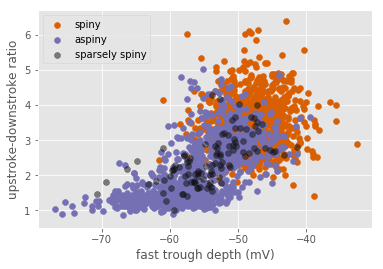

In [13]:
# Scatter plot 

fig = plt.figure()

for d_type, color in [ ["spiny", "#d95f02"], ["aspiny", "#7570b3"], ["sparsely spiny", "#0f0f0f80"] ]:
    df = ef_df[ef_df['dendrite_type'] == d_type]
    plt.scatter(df['fast_trough_v_long_square'], 
                df['upstroke_downstroke_ratio_long_square'], 
                color=color, label=d_type)

    plt.ylabel("upstroke-downstroke ratio")
    plt.xlabel("fast trough depth (mV)")
    plt.legend(loc='best')
    

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


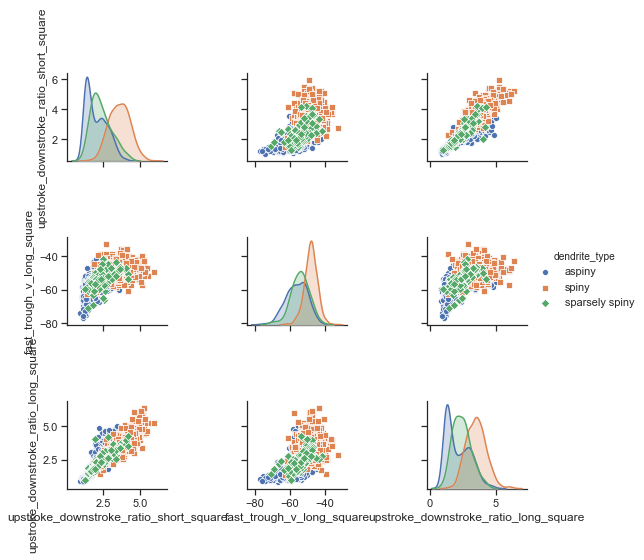

In [14]:
# scatter matrix 
import seaborn as sns

# plot a scatter matrix between a handfull of features. 
# use dendrite type as the class labels 
temp_df = ef_df[['upstroke_downstroke_ratio_short_square', 
            'fast_trough_v_long_square',
            'upstroke_downstroke_ratio_long_square',
            'dendrite_type']]
           
sns.set(style="ticks", color_codes=True)
cluster_matrix = sns.pairplot(temp_df, hue='dendrite_type', markers=["o", "s", "D"])
cluster_matrix

In [42]:
print("total feature combinations: %d" % len(ef_df.columns)**2)

total feature combinations: 2500


The three classes are not well-seperated. In every scatter plot there are overlapping values. 

**Handle Missing Data:**

In [16]:
missing_data_count = ef_df.isnull().sum(axis=0)
# narrow it down to columns missing a more than 250 values. 
missing_data_count.where(missing_data_count.values > 250)
missing_data = (missing_data_count.where(missing_data_count.values > 250)).dropna()
missing_data

slow_trough_t_long_square      880.0
slow_trough_t_ramp             645.0
slow_trough_t_short_square    1034.0
slow_trough_v_long_square      880.0
slow_trough_v_ramp             645.0
slow_trough_v_short_square    1034.0
dtype: float64

In [17]:
# drop columns missing a more than 250 values.  
for i in missing_data.index:
    ef_df.drop(columns=i, inplace=True)

**Logistic Regression**  
Split the data into a training set and a test set.

In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
# use log loss when time for evaluation. 

In [19]:
# for now, drop rows with missing values 
ef_df = ef_df.dropna()

# Treat the column 'dendrite_type' as the predictive objective 
ef_df['dendrite_type'].unique()

# drop the sparsely spiny dendrite type rows. left with 1566 instances of 
# 'aspiny' and 'spiny'. 
ef_df = ef_df[ef_df['dendrite_type'] != 'sparsely spiny']

# also drop the species and id column 
ef_df.drop(['species', 'id'], axis=1, inplace=True)

Preparing to train the model 

In [20]:
# prepare to train the model 
# dendrite type is the predictive objective. 
y = ef_df['dendrite_type']

# All other columns are features. 
X = ef_df.drop(['dendrite_type'], axis=1)

# Split 70% of the data for training and leave out 30% for testing. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# take a look at the training data
X_train.head()

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
2128,0.032308,36.116429,-11.727500,0.530357,1.09703,3.235122,1.024297,-64.468750,-58.406250,-64.568750,...,3.240013,1.460978,-64.656250,-59.046875,-73.887502,1.470609,1.360345,1.537384,-95.031258,-71.413841
885,0.017868,53.830588,-2.142500,0.229244,1.07650,3.107967,1.025136,-47.375000,-46.593751,-50.912503,...,3.122940,1.858712,-52.062504,-52.812503,-66.775003,4.269679,3.727479,4.842236,-97.343758,-66.473183
905,-0.015098,78.950909,17.437501,0.191853,1.87984,8.427893,1.027437,-47.093754,-51.447919,-55.989586,...,8.432940,1.315510,-48.187500,-54.364586,-72.640628,3.379321,4.108774,2.680139,-83.593758,-72.712036
457,0.023934,111.165000,-18.657499,0.085930,1.21230,5.708660,1.026075,-49.000004,-49.552085,-51.859379,...,5.747333,1.341195,-56.000000,-56.843754,-73.000004,4.690221,4.825507,4.750463,-83.781258,-72.030998
1356,0.004641,81.721818,6.665000,0.164286,1.07702,3.473533,1.024908,-47.625000,-48.447919,-49.787504,...,3.535347,1.078184,-58.812504,-58.447920,-68.162508,3.757865,3.681268,3.966355,-76.281258,-66.427628


**Train a model**

In [22]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

dendrite_pred = clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
clf.score(X_test, y_test)

0.8638297872340426

### Next Steps

* Build a classification tool for predicting spiny vs aspiny. 
* Is it possible to predect spiny vs aspiny vs sparsely spiny? 
* Try Out other classification methods KNN.
* can I try to make a descriptive model? 
* Try further evaluation tools. 
* Smote something maybe?... To include Human information (super imbalanced)
* Can I generate a sweep given a specific stimuli.